<a href="https://colab.research.google.com/github/afnanAlgognadi/Introduction-to-Machine-Learning/blob/main/Copy_of_Gravity_on_Moon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Text(0.5, 1.0, 'Day 1: Linear Regression Problem')

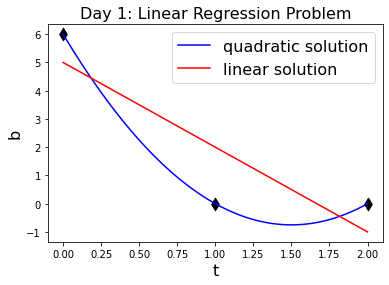

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt
t = np.linspace(0,2,100)
b_quad = 6 + (-9)*t + 3*t**2
b_lin = 5 -3*t
scatter_x = [0,1,2]
scatter_y = [6,0,0]
plt.plot(t,b_quad, label = 'quadratic solution', color = 'blue')
plt.plot(t,b_lin, label = 'linear solution', color = 'red')
plt.scatter(scatter_x,scatter_y,s = 80, marker= 'd', color='k')
plt.legend(fontsize = 16)
plt.xlabel('t', fontsize = 16)
plt.ylabel('b', fontsize = 16)
plt.title("Day 1: Linear Regression Problem", fontsize = 16)


Text(0.5, 1.0, 'Estimating Moon Gravitational Constant')

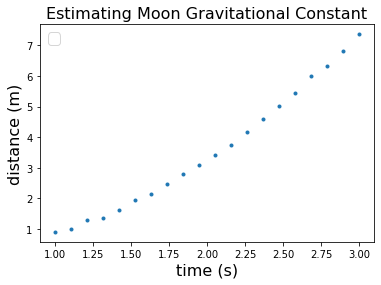

In [ ]:
#[Fictional Story] The astronauts on moon wanted to measure the value of gravity on the moon. The decide to throw a spanner 
#from different heights and measure the time needed to cover the distance and based on these values want to extract the value of 
#gravity on moon. The values might be slightly off due to human error and the (very thin) moon atmosphere. Use linear regression to 
#find the value of gravity on the moon.

import matplotlib.pyplot as plt
import numpy as np


gmoon=9.8/6
t=np.linspace(1,3,20)
s=0.5*gmoon*t**2 + 0.05*np.random.randn(t.size)
plt.plot(t,s,'.')

plt.legend(fontsize = 16)
plt.xlabel('time (s)', fontsize = 16)
plt.ylabel('distance (m)', fontsize = 16)
plt.title("Estimating Moon Gravitational Constant", fontsize = 16)

## $$ s = \Delta x = \frac{1}{2} a t^2 + v_0 t$$

## Since $v_0 = 0$:

## $$ s = \Delta x = \frac{1}{2} a t^2 $$

## $$a = \frac{2\Delta x}{t^2}$$

## Now we can do a replacement $\hat{t} = t^2$ and $m=\frac{1}{2} a $

## Looks like a linear rgression!! 

## $$ s = \Delta x = m \hat{t}$$


#https://tinyurl.com/yytjsdnm

[ 0.03254345 -0.0646638   0.835399  ]


Text(0.5, 1.0, 'Estimating Moon Gravitational Constant')

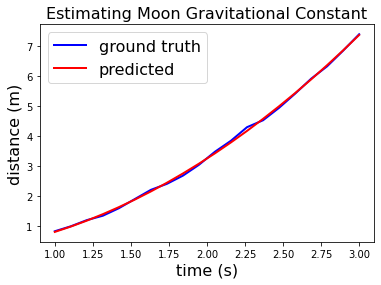

In [ ]:
A=[]
nbasis= 2
for i in range(nbasis+1):
  A.append(t**i)
A=np.array(A)
A=A.T
# parameters are usually called theta or weights W
theta = np.linalg.inv(A.T @ A) @ (A.T @ s)
print(theta)

shat = A @ theta
plt.plot(t,s, label='ground truth', color='blue', linewidth=2)
plt.plot(t,shat, label = 'predicted', color='red', linewidth=2)
plt.legend(fontsize = 16)
plt.xlabel('time (s)', fontsize = 16)
plt.ylabel('distance (m)', fontsize = 16)
plt.title("Estimating Moon Gravitational Constant", fontsize = 16)

In [ ]:
import sklearn.linear_model as lm
import sklearn.preprocessing as preprocessing
import sklearn.pipeline as pipeline


pipeline = pipeline.Pipeline([ ('basis', preprocessing.PolynomialFeatures(2)), ('model', lm.LinearRegression())])
pipeline.fit(t.reshape(-1,1),s.reshape(-1,1))

Pipeline(steps=[('basis', PolynomialFeatures()), ('model', LinearRegression())])

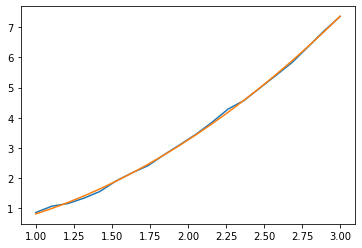

In [ ]:
shat=pipeline.predict(t.reshape(-1,1))
plt.plot(t,s,t,shat)

In [ ]:
pipeline['model'].coef_

array([[ 0.        , -0.03460066,  0.82900878]])